In [1]:
# install tensorflow 
import tensorflow as tf

# notebook for an artificial neural network (ANN) to classify numbers from the MNIST dataset

this dataset is built into tensorflow, and contains grayscale images of handwritten digits 0 to 9 

the ANN works as a multiclass (k-class) classifier, where k = 10 for the number of digits

In [2]:
# get data from tf
mnist = tf.keras.datasets.mnist

# load data
# load_data() returns a 2 tuples containing train & test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixels (x) by dividing by 255, so values are between 0 and 1
x_train, x_test = x_train/255., x_test/255.
print("x_train.shape = ", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape =  (60000, 28, 28)


In [4]:
# next, build the model (see written notes for more details)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),     # images are 28x28, flattens to 1D
    tf.keras.layers.Dense(128, activation='relu'),    # single layer with 128 nodes
    tf.keras.layers.Dropout(0.2),                     # dropout = regularization, 20%  
    tf.keras.layers.Dense(10, activation='softmax')   # output layer with 10 nodes
])

In [5]:
# compile model
model.compile(optimizer='adam',                        # traditional optimizer
              loss='sparse_categorical_crossentropy',  # see notes, reduces computation time
              metrics=['accuracy'])                    # tracking accuracy 

In [6]:
# train model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3020 - accuracy: 0.9120 - val_loss: 0.1476 - val_accuracy: 0.9569
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1438 - accuracy: 0.9577 - val_loss: 0.1003 - val_accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1091 - accuracy: 0.9664 - val_loss: 0.0857 - val_accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0909 - accuracy: 0.9722 - val_loss: 0.0771 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0771 - accuracy: 0.9753 - val_loss: 0.0664 - val_accuracy: 0.9793
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0670 - accuracy: 0.9791 - val_loss: 0.0689 - val_accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0603 - accuracy: 0.9800 - val_loss: 0.0655 - val_accuracy:

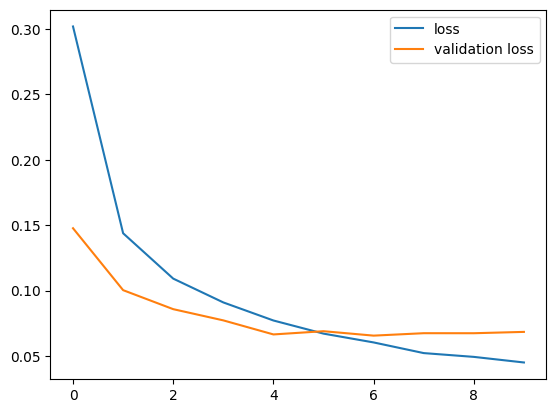

In [7]:
# plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

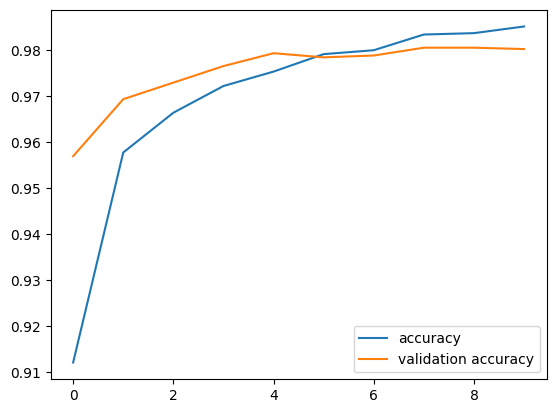

In [8]:
# next, plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [9]:
# evaluate model on the test set (we already see this in training)
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9802
[0.0683371052145958, 0.9801999926567078]


313/313 [==============================] - 0s 1ms/step
confusion matrix without normalization
[[ 972    0    2    1    0    1    1    2    1    0]
 [   0 1122    3    2    0    1    2    1    4    0]
 [   1    2 1015    2    1    0    2    7    2    0]
 [   0    0    2  999    0    2    0    4    2    1]
 [   1    1    2    0  961    0    4    2    1   10]
 [   2    0    0   21    2  856    6    0    4    1]
 [   4    3    2    1    4    3  941    0    0    0]
 [   2    4    7    0    0    0    0 1011    1    3]
 [   7    1    2    6    4    0    2    4  944    4]
 [   4    2    0    5    8    2    0    6    1  981]]


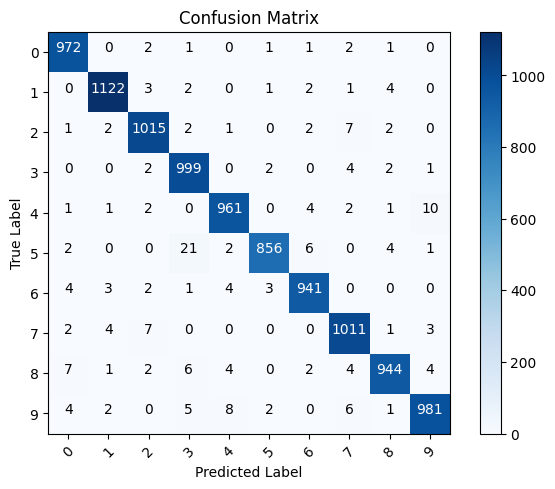

In [15]:
# plot the confusion matrix
# this tells us: for each label, how many predictions corresponded to that label
# we want most of the entries to be on the diagonal (i.e. entries = prediction)

# the following function requires sklearn and itertools
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                          title='Confusion Matrix', 
                          cmap=plt.cm.Blues): 
  """
  This function prints and plots the confusion matrix, 
  normalization can be applied by setting normalize=True.
  """
  if normalize: 
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("normalized confusion matrix")
  else: 
    print("confusion matrix without normalization")

  print(cm)
    
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
    plt.text(j, i, format(cm[i,j], fmt), 
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black') 

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))      

# highest inaccuracy = high number of predictions in the light squares


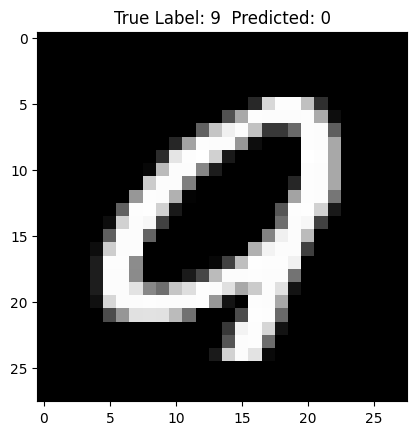

In [20]:
# from the values shown on the confusion matrix, plot some misclassified examples

# index of misclassified predictions using np.where
# np.where returns two values, but index is first (hence [0])
misclassified_idx = np.where(p_test != y_test)[0]

# select a random index and plot
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True Label: %s  Predicted: %s' % (y_test[i], p_test[i]))
plt.show()